<a href="https://colab.research.google.com/github/DevBauti/ALittleBitofColab/blob/main/RegresionLinealSimpleyMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib pandas
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

La regresion lineal simple se da cuando hay una relación entre dos variables, la multiple se da cuando hay una relación entre más de dos variables.


La regresion lineal simple es un plano donde se puede trazar una linea recta.

La representacion matematica de esto searia "y = w0 + w1x"

In [2]:
np.random.seed(42)
x = np.random.rand(100)

y = 2 * x + 1 + np.random.randn(100) * 0.1

data = pd.DataFrame({'x': x, 'y': y})
data.head()


,x,y
0,0.374540,1.757785
1,0.950714,2.871528
2,0.731994,2.473164
3,0.598658,1.998560
4,0.156019,1.290070


Representacion de los datos generados

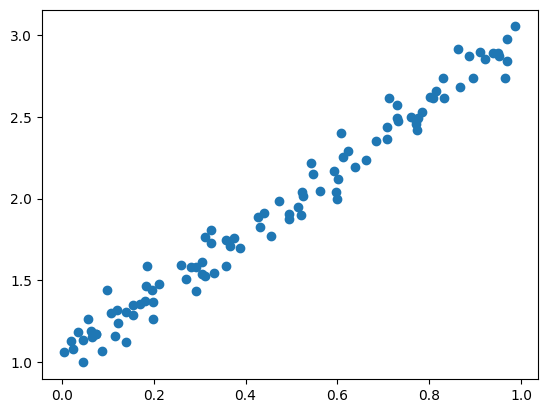

In [3]:
plt.scatter(data['x'], data['y'])
plt.show()

Regresion lineal simple

In [4]:
# Para dividir entre entrenamiento y validacion
x_train, x_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.2)

In [5]:
#llamada
model = LinearRegression()
# entrenamiento
model.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [6]:
y_pred = model.predict(x_test.values.reshape(-1, 1))
# MSE
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred).round(3)
r2 = r2_score(y_test, y_pred).round(3)

print(mse, r2)

0.012 0.975


Representacion grafica

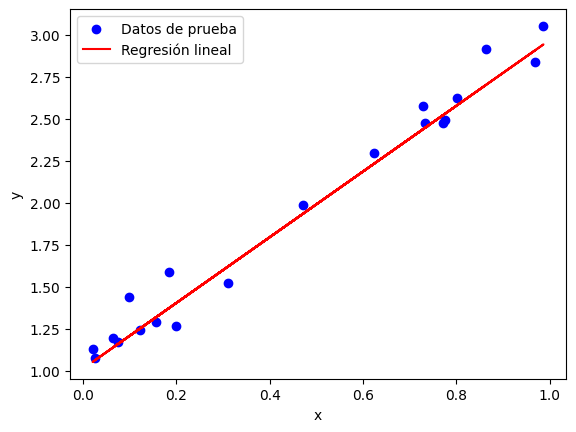

In [7]:
plt.scatter(x_test, y_test, color='blue', label='Datos de prueba')
plt.plot(x_test, y_pred, color='red', label='Regresión lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Regresion Lineal Multiple

In [8]:
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 10
Y = 2.5 * X1 + 1.5 * X2 + np.random.randn(100) * 2

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

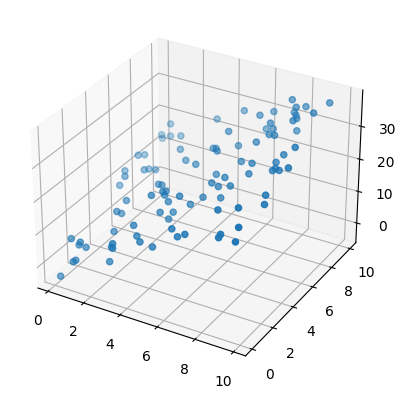

In [14]:
# Muestra de los datos

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['Y'])

plt.show()


In [10]:
# Separación en conjunto de entrenamiento y prueba usando pandas
X = df[['X1', 'X2']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Creación y entrenamiento del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluación del modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

5.336367813601398 0.919571407491392


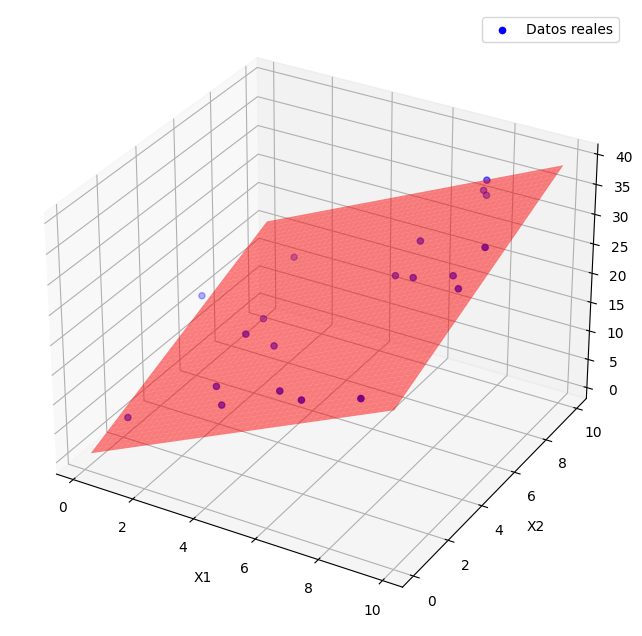

In [12]:
# Visualizacion
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafico de datos
ax.scatter(X_test['X1'], X_test['X2'], y_test, color='blue', label='Datos reales')

# Crea el plano o malla de la regresion
X1_surf, X2_surf = np.meshgrid(np.linspace(X['X1'].min(), X['X1'].max(), 100),
                               np.linspace(X['X2'].min(), X['X2'].max(), 100))

# Predecir los valores de Y en el plano
Y_surf = modelo.predict(pd.DataFrame({'X1': X1_surf.ravel(), 'X2': X2_surf.ravel()}))
Y_surf = Y_surf.reshape(X1_surf.shape)

# Gráfico
ax.plot_surface(X1_surf, X2_surf, Y_surf, color='red', alpha=0.5)

# Etiquetas y leyenda
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()